# Разбор и анализ датасета сервиса такси в Перу

Первый шаг - импорт необоходимых библиотек и загрузка данных

In [2]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('3_taxi_peru.csv', sep = ';')

In [8]:
df.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaN,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaN,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaN,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23111 entries, 0 to 23110
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   journey_id        23111 non-null  object 
 1   user_id           23111 non-null  object 
 2   driver_id         19726 non-null  object 
 3   taxi_id           19726 non-null  object 
 4   icon              23111 non-null  object 
 5   start_type        23111 non-null  object 
 6   start_at          23111 non-null  object 
 7   start_lat         23111 non-null  object 
 8   start_lon         23111 non-null  object 
 9   end_at            22835 non-null  object 
 10  end_lat           23111 non-null  object 
 11  end_lon           23111 non-null  object 
 12  end_state         23099 non-null  object 
 13  driver_start_lat  19621 non-null  object 
 14  driver_start_lon  19621 non-null  object 
 15  arrived_at        17716 non-null  object 
 16  source            22988 non-null  object

Анализ и визуализация количества поездок по платформам за все время

In [13]:
df_group = df.groupby('source', as_index=False) \
             .agg({'journey_id': 'count'}) \
             .sort_values('journey_id', ascending=False)
df_group

,source,journey_id
3,iPhone,9741
4,web,7631
0,Android,4909
2,iPad,571
1,Wap,136


<AxesSubplot:xlabel='source', ylabel='journey_id'>

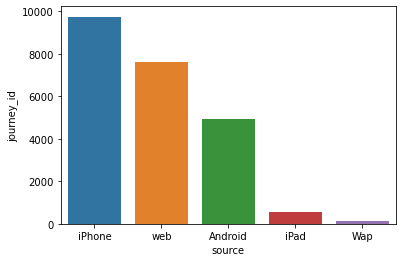

In [14]:
sns.barplot(x='source', y='journey_id', data=df_group)

Диаграмма с отображением статуса поездок с разбивкой по платформам

<AxesSubplot:xlabel='source', ylabel='count'>

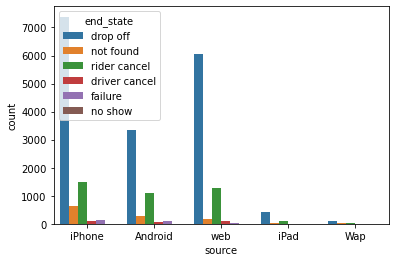

In [16]:
sns.countplot(x='source', hue='end_state', data=df)

Сравнение оценок, которые выставляли пассажиры водителям и наоборот. 
  
driver_score - оценка, которая выставлялась водителю от пассажира  
rider_score - оценка, которая выставлялась пассажиру от водителя

In [24]:
driver_score_counts = df.driver_score.value_counts(normalize=True) \
                        .mul(100) \
                        .round(2) \
                        .reset_index() \
                        .rename(columns={'index': 'driver_score', 'driver_score': 'percentage'}) \
                        .sort_values('driver_score')

In [25]:
driver_score_counts

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


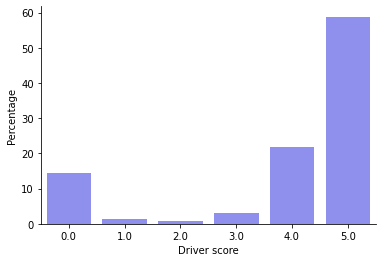

In [31]:
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()
plt.show()

In [32]:
rider_score_counts = df.rider_score.value_counts(normalize=True) \
                       .mul(100) \
                       .round(2) \
                       .reset_index() \
                       .rename(columns={'index': 'rider_score', 'rider_score': 'percentage'}) \
                       .sort_values('rider_score')

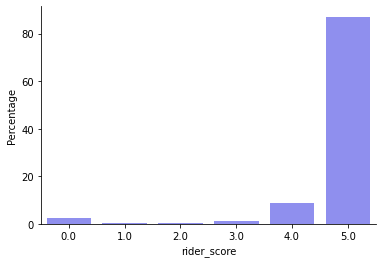

In [33]:
ax = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='rider_score', ylabel='Percentage')
sns.despine()
plt.show()

Видно, что пассажиры чаще никак не оценивали поездку, либо давали оценки ниже 5, чем водители. Возможно это связано с тем, что водители опаздывают и начинают поездку в приложении еще до того, как пассажир сел. Найдем время этой задержки. Для этого переведем соответствующие столбцы в формат даты, а затем найдем задержку между стартом поездки и посадкой в минутах.

In [46]:
df['start_at']   = pd.to_datetime(df['start_at'])
df['end_at']     = pd.to_datetime(df['end_at'])
df['arrived_at'] = pd.to_datetime(df['arrived_at'])

In [47]:
df.dtypes

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
wait_time                  float64
dtype: object

In [48]:
df['wait_time'] = df['arrived_at'] - df['start_at']
df['wait_time'] = df.wait_time.astype('timedelta64[m]')

Поищем взаимосвязь между оценкой и временем задержки. Сгруппируем данные и найдем, какая в среднем задержка у оценок от 1 до 5.

In [45]:
df.groupby('rider_score').agg({'wait_time': 'mean'})

,wait_time
rider_score,
0.0,6.840909
1.0,10.906250
2.0,9.433333
3.0,7.995305
4.0,7.001472
5.0,6.021189


Да, хорошо видна взаимосвязь оценки и задержки водителя - чем ниже оценка, тем больше задержка. Найдем тех, кто чаще всего опаздывает, и передадим в отдел контроля качества.

In [51]:
driver_wait_time = df.query('start_type == "reserved" and wait_time > 0.0').groupby('driver_id', as_index=False).agg({'journey_id':'count'}).sort_values('journey_id', ascending=False)

In [41]:
driver_wait_time

,driver_id,journey_id
24,406921adcca37705ef527b4246c0cfea,67
86,d665fb9f75ef5d9cd0fd89479380ba78,59
93,ec84a73745199ff840ecafcb924383ad,57
29,56f59b58bcbbd1cdabc3652e713134c2,51
77,c814db2127582cf95dea1f74f43127c2,45
...,...,...
88,d7bf644eb441cda6127f91addebb85c4,1
71,b68895736389f2949faa8c73555b81ac,1
51,8cb98e46b27af1e6fca8768a2a6329f3,1
16,389bfa333ba8fa7281dd5f0e1b57c0c1,1


Теперь найдем динамику количества поездок по дням и по месяцам.

In [52]:
df['month'] = df.start_at.dt.month
df['weekday'] = df.start_at.dt.strftime('%A')

/Users/andrejsklarov/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='count'>

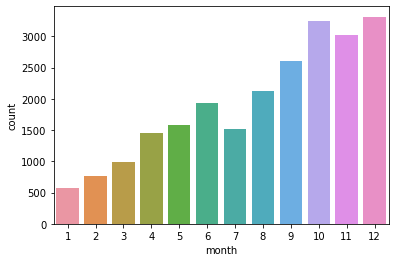

In [53]:
sns.countplot(df['month'])

In [56]:
users_by_month = df.groupby('month', as_index=False).agg({'month': 'count'})

In [57]:
users_by_month

,month,user_id
0,1,573
1,2,766
2,3,983
3,4,1445
4,5,1584
5,6,1936
6,7,1512
7,8,2120
8,9,2598
9,10,3240


/Users/andrejsklarov/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weekday', ylabel='count'>

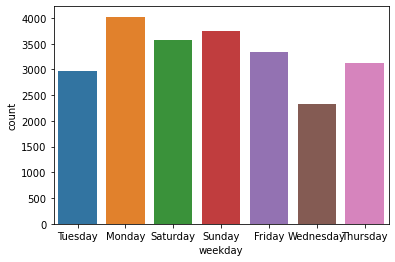

In [54]:
sns.countplot(df['weekday'])

Видим, что положительная динамика по месяцам связана с приростом пользователей. Что касается дней, то самый активный день по количеству поездок - понедельник, а наименее активный - среда.